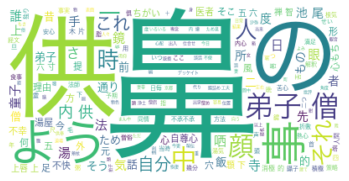

In [6]:
import requests
from janome.tokenizer import Tokenizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud

url = 'http://www.aozora.gr.jp/cards/000879/files/42_15228.html'
r = requests.get(url, timeout=10)

soup = BeautifulSoup(r.content, 'lxml')

text_elm = soup.find('div', attrs={'class': 'main_text'})

[e.extract() for e in text_elm.select('rt')]

text = text_elm.text

stop_word_url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/Filter/StopWord/word/Japanese.txt'
r_stopword = requests.get(stop_word_url, timeout=10)
stop_words = r_stopword.text.split()

t = Tokenizer()
words = []
for token in t.tokenize(text):
    if token.part_of_speech.split(',')[0] == '名詞' and token.surface not in stop_words:
            words.append(token.surface)
            
font_path = '/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc'
wordcloud = WordCloud(background_color='white', font_path=font_path, regexp=r"\w+").generate(" ".join(words))

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()